In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

/Users/r3dmaohong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

In [5]:
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, n_folds=2),
              scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 3 ..., 7 1], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features : 3


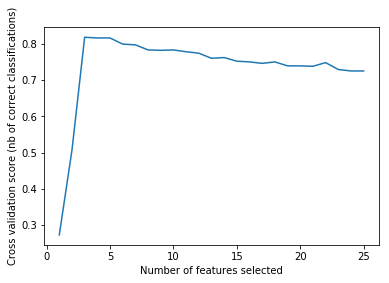

In [6]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [7]:
rfecv.grid_scores_

array([ 0.27289582,  0.50695225,  0.81804145,  0.81606538,  0.81605338,
        0.79910677,  0.79704669,  0.78303419,  0.78199215,  0.78302219,
        0.77802801,  0.77405187,  0.76007536,  0.76201543,  0.75200307,
        0.750015  ,  0.74600286,  0.750003  ,  0.73910461,  0.7390206 ,
        0.73800257,  0.74803893,  0.72906825,  0.7250441 ,  0.7250561 ])

In [12]:
import numpy as np
np.argmax(rfecv.grid_scores_)+1 # index starts from zero

3